In [1]:
include("ultrasoundgeneration.jl")

longcat (generic function with 1 method)

In [2]:
using PyCall
pushfirst!(PyVector(pyimport("sys")."path"), "")
ultrasoundgeneration = pyimport("ultrasoundgeneration")

names = readdir(ultrasoundgeneration.train_volumes_path)[1:40]

40-element Array{String,1}:
 "Pancreas_14.nrrd"
 "Pancreas_15.nrrd"
 "Pancreas_16.nrrd"
 "Pancreas_17.nrrd"
 "Pancreas_18.nrrd"
 "Pancreas_19.nrrd"
 "Pancreas_20.nrrd"
 "Pancreas_21.nrrd"
 "Pancreas_22.nrrd"
 "Pancreas_23.nrrd"
 "Pancreas_24.nrrd"
 "Pancreas_25.nrrd"
 "Pancreas_26.nrrd"
 ⋮                 
 "Pancreas_42.nrrd"
 "Pancreas_43.nrrd"
 "Pancreas_44.nrrd"
 "Pancreas_45.nrrd"
 "Pancreas_46.nrrd"
 "Pancreas_47.nrrd"
 "Pancreas_48.nrrd"
 "Pancreas_49.nrrd"
 "Pancreas_50.nrrd"
 "Pancreas_51.nrrd"
 "Pancreas_52.nrrd"
 "Pancreas_53.nrrd"

In [11]:
struct AnnotatedImage
    image::ItkImage
    annotation::Array{Array{Float64,1},1}
end


annotated_images = Array{AnnotatedImage, 1}()
for name = names
    print(name)
    image, annotation = ultrasoundgeneration.load_image_annotation(
        name, ultrasoundgeneration.train_volumes_path)
    jimage = ItkImage(image)
    push!(annotated_images, AnnotatedImage(jimage, annotation))
end

Pancreas_14.nrrdPancreas_15.nrrdPancreas_16.nrrdPancreas_17.nrrdPancreas_18.nrrdPancreas_19.nrrdPancreas_20.nrrdPancreas_21.nrrdPancreas_22.nrrdPancreas_23.nrrdPancreas_24.nrrdPancreas_25.nrrdPancreas_26.nrrdPancreas_27.nrrdPancreas_28.nrrdPancreas_29.nrrdPancreas_30.nrrdPancreas_31.nrrdPancreas_32.nrrdPancreas_33.nrrdPancreas_34.nrrdPancreas_35.nrrdPancreas_36.nrrdPancreas_37.nrrdPancreas_38.nrrdPancreas_39.nrrdPancreas_40.nrrdPancreas_41.nrrdPancreas_42.nrrdPancreas_43.nrrdPancreas_44.nrrdPancreas_45.nrrdPancreas_46.nrrdPancreas_47.nrrdPancreas_48.nrrdPancreas_49.nrrdPancreas_50.nrrdPancreas_51.nrrdPancreas_52.nrrdPancreas_53.nrrd

In [12]:
t_annotated_images = Array{AnnotatedImage, 1}()
for name = readdir(ultrasoundgeneration.test_volumes_path)
    print(name)
    image, annotation = ultrasoundgeneration.load_image_annotation(
        name, ultrasoundgeneration.test_volumes_path)
    jimage = ItkImage(image)
    push!(t_annotated_images, AnnotatedImage(jimage, annotation))
end

Pancreas_10.nrrdPancreas_11.nrrdPancreas_12.nrrdPancreas_13.nrrdPancreas_6.nrrdPancreas_7.nrrdPancreas_8.nrrdPancreas_9.nrrd

In [13]:
i = 0

0

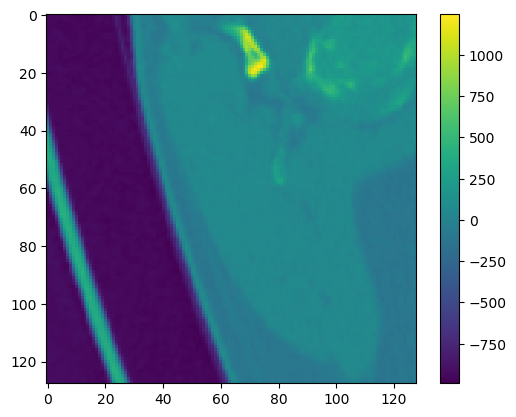

PyObject <matplotlib.colorbar.Colorbar object at 0x7f17db42de48>

In [14]:
using PyPlot
i += 1
t = generate_sample(annotated_images[i].image, annotated_images[i].annotation)
plt.imshow(t["data"][1])
colorbar()


In [15]:
network_parallel = pyimport("train_network_withangle")


PyObject <module 'train_network_withangle' from '/media/data/hastings/ct-angledslice-align/train_network_withangle.py'>

In [16]:
network_parallel.model.load_weights("models/includeangle")

2020-06-24 22:49:18.877076: W tensorflow/core/util/tensor_slice_reader.cc:95] Could not open models/includeangle: Data loss: not an sstable (bad magic number): perhaps your file is in a different file format and you need to use a different restore operator?


In [17]:
@time tdata, tclasses = generate_data(
    [x.image for x in t_annotated_images],
    [x.annotation for x in t_annotated_images]
)
tdata = longcat(tdata)
tclasses = longcat(tclasses)
0

i  2.512279 seconds (2.97 M allocations: 2.333 GiB, 24.06% gc time)


0

In [29]:
while true
    data, classes = generate_data(
        [x.image for x in annotated_images], 
        [x.annotation for x in annotated_images]
    )
    data = longcat(data)
    classes = longcat(classes)
    network_parallel.model.fit(
        [data, copy(classes[:, 4:end])], copy(classes[:, 1:3]), batch_size=90, 
        verbose=2, validation_data=((tdata, copy(tclasses[:, 4:end])), copy(tclasses[:, 1:3]))
    )
    if rand() < .1
        network_parallel.model.save("models/includeangle2")
    end
end

iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 17s - loss: 0.2326 - val_loss: 3.1308
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2625 - val_loss: 0.8404
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 12s - loss: 0.2461 - val_loss: 2.0968
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2503 - val_loss: 0.3785
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2735 - val_loss: 0.5213
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2413 - val_loss: 0.2343
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2262 - val_loss: 2.3456
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2207 - val_loss: 0.3144
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2249 - val_loss: 1.9785
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2336 - val_loss: 0.2242
iTrain on 

iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2642 - val_loss: 0.5160
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2283 - val_loss: 0.3784
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 12s - loss: 0.2042 - val_loss: 0.3775
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 12s - loss: 0.2219 - val_loss: 0.3195
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 12s - loss: 0.2106 - val_loss: 1.1073
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 12s - loss: 0.2369 - val_loss: 0.3451
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 12s - loss: 0.2240 - val_loss: 0.2050
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 12s - loss: 0.2379 - val_loss: 0.7269
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 12s - loss: 0.2050 - val_loss: 0.3741
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 12s - loss: 0.2480 - val_loss: 2.0575
iTrain on 

iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2105 - val_loss: 0.4406
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2048 - val_loss: 1.3095
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2202 - val_loss: 0.2327
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2044 - val_loss: 0.3970
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2266 - val_loss: 0.3228
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2269 - val_loss: 2.3876
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2406 - val_loss: 0.2750
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2120 - val_loss: 1.5869
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 12s - loss: 0.2263 - val_loss: 0.2921
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2218 - val_loss: 0.3017
iTrain on 

iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2023 - val_loss: 1.5941
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2453 - val_loss: 0.2513
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2247 - val_loss: 0.9065
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2561 - val_loss: 1.4199
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2182 - val_loss: 0.5654
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2096 - val_loss: 1.3697
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.1980 - val_loss: 0.5092
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2084 - val_loss: 1.0838
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2627 - val_loss: 1.0833
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2360 - val_loss: 0.5243
iTrain on 

iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2172 - val_loss: 1.7474
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2328 - val_loss: 0.3977
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2122 - val_loss: 0.2072
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2388 - val_loss: 0.5045
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 10s - loss: 0.2245 - val_loss: 0.2203
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 10s - loss: 0.2107 - val_loss: 3.1970
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 12s - loss: 0.1968 - val_loss: 0.3028
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2268 - val_loss: 0.4177
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2298 - val_loss: 0.5501
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2428 - val_loss: 0.3276
iTrain on 

iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2276 - val_loss: 0.2913
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2142 - val_loss: 1.2995
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2182 - val_loss: 0.3671
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.1850 - val_loss: 0.8367
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2085 - val_loss: 0.4547
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2193 - val_loss: 0.5608
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2074 - val_loss: 0.3540
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2296 - val_loss: 1.2152
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2019 - val_loss: 1.1144
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2003 - val_loss: 0.3881
iTrain on 

iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2084 - val_loss: 0.4427
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2166 - val_loss: 0.2830
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2454 - val_loss: 2.1151
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2088 - val_loss: 0.5784
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2440 - val_loss: 0.5873
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2048 - val_loss: 0.2722
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2527 - val_loss: 1.1996
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2459 - val_loss: 0.4954
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2424 - val_loss: 0.4933
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2036 - val_loss: 0.6920
iTrain on 

iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2035 - val_loss: 0.4055
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.1982 - val_loss: 0.6393
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2112 - val_loss: 0.3597
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.1809 - val_loss: 0.2420
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.1787 - val_loss: 2.0539
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.1967 - val_loss: 1.0207
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2392 - val_loss: 0.7780
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2046 - val_loss: 0.3366
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2064 - val_loss: 0.5321
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.1986 - val_loss: 1.7707
iTrain on 

iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.1950 - val_loss: 0.5020
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2000 - val_loss: 0.8323
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2132 - val_loss: 0.8136
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2417 - val_loss: 0.2341
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2061 - val_loss: 0.3252
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.1826 - val_loss: 0.1473
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.1939 - val_loss: 0.1700
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 10s - loss: 0.2153 - val_loss: 0.2202
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 10s - loss: 0.2015 - val_loss: 0.2278
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 10s - loss: 0.2012 - val_loss: 0.3765
iTrain on 

iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 12s - loss: 0.2195 - val_loss: 0.2586
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 12s - loss: 0.2173 - val_loss: 0.1810
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 12s - loss: 0.2079 - val_loss: 0.2956
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.1957 - val_loss: 0.4147
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 12s - loss: 0.2267 - val_loss: 0.3282
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 12s - loss: 0.2049 - val_loss: 1.2626
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 12s - loss: 0.2188 - val_loss: 1.1703
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 12s - loss: 0.1916 - val_loss: 0.8498
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.1998 - val_loss: 0.7800
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 12s - loss: 0.1939 - val_loss: 1.3461
iTrain on 

iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 10s - loss: 0.2375 - val_loss: 0.8504
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 10s - loss: 0.2356 - val_loss: 0.4612
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2075 - val_loss: 0.1930
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.1922 - val_loss: 1.2775
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2238 - val_loss: 0.3914
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.1758 - val_loss: 0.5297
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.1861 - val_loss: 0.1861
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2319 - val_loss: 0.8552
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.1885 - val_loss: 0.5448
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2162 - val_loss: 0.3576
iTrain on 

iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2204 - val_loss: 0.9701
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2209 - val_loss: 2.8038
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.1887 - val_loss: 0.3107
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.1989 - val_loss: 1.1986
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 10s - loss: 0.2010 - val_loss: 0.4246
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 10s - loss: 0.2082 - val_loss: 0.2553
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 10s - loss: 0.2088 - val_loss: 0.9107
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 10s - loss: 0.2211 - val_loss: 0.5013
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 10s - loss: 0.1932 - val_loss: 0.5412
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.1737 - val_loss: 0.3201
iTrain on 

iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 10s - loss: 0.1897 - val_loss: 2.6700
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.1889 - val_loss: 0.2072
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.1837 - val_loss: 0.2217
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.1862 - val_loss: 0.3763
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.1806 - val_loss: 0.3232
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.1825 - val_loss: 0.9698
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2189 - val_loss: 0.5660
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2019 - val_loss: 2.3016
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2242 - val_loss: 1.1908
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.1929 - val_loss: 0.2464
iTrain on 

iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 10s - loss: 0.2145 - val_loss: 4.6131
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2092 - val_loss: 0.2373
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.1739 - val_loss: 0.2055
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.1532 - val_loss: 3.2334
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2041 - val_loss: 1.3523
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2108 - val_loss: 0.4553
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2061 - val_loss: 0.3405
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2244 - val_loss: 0.1828
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2075 - val_loss: 0.2326
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2022 - val_loss: 2.8126
iTrain on 

iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.1842 - val_loss: 0.7721
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2096 - val_loss: 2.0461
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.1952 - val_loss: 0.2629
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.1775 - val_loss: 0.4457
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.1863 - val_loss: 0.4893
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.1780 - val_loss: 0.2530
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 12s - loss: 0.1903 - val_loss: 0.2941
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.1870 - val_loss: 0.4407
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2198 - val_loss: 0.3215
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.1846 - val_loss: 0.4241
iTrain on 

iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.1752 - val_loss: 0.1782
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2210 - val_loss: 1.7251
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.1916 - val_loss: 0.2741
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2221 - val_loss: 0.2559
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2138 - val_loss: 0.5040
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2143 - val_loss: 0.6230
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.1910 - val_loss: 0.3561
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 12s - loss: 0.1858 - val_loss: 0.2604
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.1766 - val_loss: 0.4844
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2176 - val_loss: 0.2866
iTrain on 

iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 10s - loss: 0.2093 - val_loss: 0.3415
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 10s - loss: 0.2033 - val_loss: 0.3351
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 10s - loss: 0.1916 - val_loss: 0.6077
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 10s - loss: 0.2083 - val_loss: 2.4300
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 10s - loss: 0.1753 - val_loss: 0.6178
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 10s - loss: 0.1978 - val_loss: 0.2249
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 10s - loss: 0.1705 - val_loss: 0.2116
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 10s - loss: 0.2152 - val_loss: 1.0924
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 10s - loss: 0.1755 - val_loss: 0.4999
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.1888 - val_loss: 0.4738
iTrain on 

iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 10s - loss: 0.1938 - val_loss: 0.2529
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 10s - loss: 0.1784 - val_loss: 0.1836
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 10s - loss: 0.2182 - val_loss: 0.4966
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 10s - loss: 0.1809 - val_loss: 0.3106
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 10s - loss: 0.1864 - val_loss: 0.3296
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 10s - loss: 0.1818 - val_loss: 0.4608
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 10s - loss: 0.2016 - val_loss: 0.7538
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 10s - loss: 0.1974 - val_loss: 0.2589
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.1786 - val_loss: 0.1622
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.1961 - val_loss: 0.2446
iTrain on 

iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2363 - val_loss: 1.0113
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2010 - val_loss: 0.5040
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2110 - val_loss: 0.9039
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2241 - val_loss: 0.2607
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.1922 - val_loss: 1.0474
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.2050 - val_loss: 0.2984
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.1807 - val_loss: 0.3394
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.1847 - val_loss: 0.2351
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 11s - loss: 0.1589 - val_loss: 0.2050
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 10s - loss: 0.2338 - val_loss: 0.7162
iTrain on 

InterruptException: InterruptException:

In [ ]:
while true
    data, classes = generate_data(
        [x.image for x in annotated_images], 
        [x.annotation for x in annotated_images]
    )
    network_parallel.model.fit(
        longcat(data), longcat(classes), batch_size=64, 
        verbose=2, validation_data=(tdata, tclasses)
    )
end

In [10]:
using BenchmarkTools

In [22]:
network_parallel.model.compile(loss=network_parallel.keras.losses.mean_squared_error,
              optimizer=network_parallel.Adam(lr=0.00005))

In [8]:
@time [generate_sample(jimage, annotation) for _ = 1:7000]
0

  2.381736 seconds (5.91 M allocations: 2.022 GiB, 11.93% gc time)


0

In [19]:
@time data, classes = generate_data(
    [x.image for x in annotated_images], 
    [x.annotation for x in annotated_images]
)
0

i  7.974665 seconds (2.49 M allocations: 11.854 GiB, 24.93% gc time)


0

In [ ]:
network_parallel.model.fit(longcat(data), longcat(classes))

In [30]:
predictions = network_parallel.model.predict((tdata, tclasses[:, 4:end]))
0

0

In [20]:
data =  longcat(data)
classes = longcat(classes)

2680×6 Array{Float32,2}:
 -2.3612      2.98488    -0.317325   -0.312693     0.971511    -0.0364157 
 -3.77088    -1.1458      1.37392    -0.293181     0.209181    -0.0263561 
 -0.2158      2.821      -1.54949    -0.100725    -0.381574    -0.169062  
 -1.08362    -4.68368     4.19826     0.00426911   0.646132    -0.0348382 
  2.9246      0.272539   -1.12352     0.109778    -0.25202     -0.144061  
 -5.16185     0.608053   -5.77216     0.0582806   -0.473698    -0.517308  
 -0.939647    2.52472     0.543708   -0.0467159    0.211801     0.218336  
 -0.680392   -0.952679   -0.0550417   0.351744    -0.4231       0.364508  
 -0.290873   -5.96941    -0.951299   -0.277362     1.07724      0.380513  
  0.0115749  -4.87155     0.830851    0.688096     0.438346     0.0268029 
 -1.92966     4.93054    -3.08607    -0.563987     0.545114     0.31458   
 -1.04835    -0.700078   -0.284712    0.313875    -0.748442    -0.400176  
  0.0277693  -2.45696    -4.82403     0.861593    -1.0333      -0.435484  


In [30]:
#network_parallel.model.save("models/juliatrain3")

In [37]:
tclasses[103]

-2.0028841f0

In [ ]:
0

In [51]:
i = 0

0

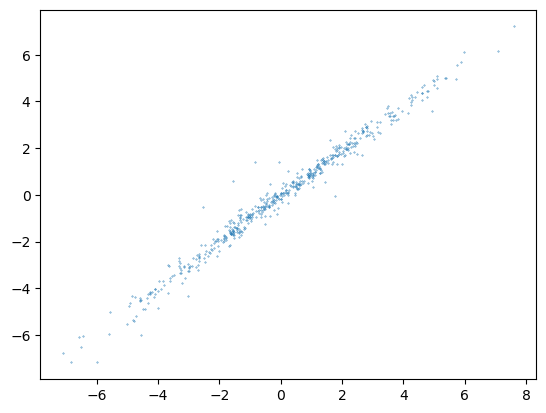

23.197008

In [54]:
i += 1
scatter(tclasses[:, i], predictions[:, i], s= 0.1)
show()
print(sum(tclasses[:, i] .- predictions[:, i]))

In [35]:
imshow(data[1][:, :, 4])

UndefVarError: UndefVarError: data not defined

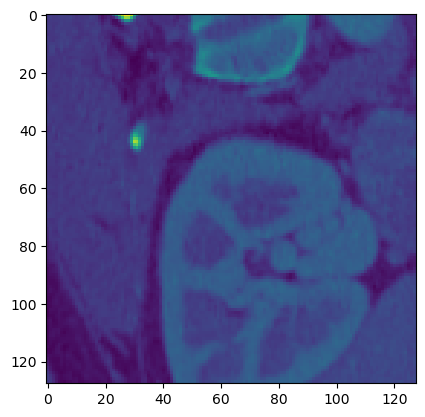

PyObject <matplotlib.image.AxesImage object at 0x0000001CA9F1F2E8>

In [57]:
imshow(data[1][:, :, 3])

In [49]:
network_parallel.model.evaluate((tdata, tclasses[:, 4:end]), tclasses[:, 1:3])

536/536 [==============================] - 4s 7ms/step


0.23950253471509733

In [46]:
tdata

536×128×128×4 Array{Float32,4}:
[:, :, 1, 1] =
 0.0286113    0.0297012    0.0311875   …   0.0335137    0.0334883 
 0.0260898    0.0268984    0.0324648       0.0263516    0.0259883 
 0.521023     0.520916     0.531498        0.482781     0.48134   
 0.0692559    0.036418     0.0314961       0.521074     0.515477  
 0.0258457    0.0232852    0.0205762       0.464072     0.458311  
 0.0418652    0.0381738    0.0264707   …   0.129314     0.0873496 
 0.504076     0.503789     0.500543        0.666941     0.684818  
 0.0291563    0.0338516    0.0303359       0.0739688    0.0744258 
 0.445494     0.449293     0.452703        0.435586     0.444687  
 0.0232676    0.0234414    0.0243652       0.551439     0.547307  
 0.00511328   0.00514062   0.00619531  …  -0.00717187  -0.00351562
 0.528787     0.525613     0.529543        0.055668     0.0389219 
 0.43409      0.370729     0.291846        0.0232324    0.022373  
 ⋮                                     ⋱                          
 0.683465     0

In [ ]:
function generate